In [1]:
!pip install newsapi-python

  Using cached newsapi_python-0.2.6-py2.py3-none-any.whl (7.9 kB)


In [2]:
import pandas as pd
import numpy as np
from datetime import *
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='41fc13503d2743c8b4473817716996ba')

In [4]:
sources = newsapi.get_sources()
sources_list = []
for source in sources['sources']:
    sources_list.append(source['id'])
print(len(sources_list))
sources_list

128


['abc-news',
 'abc-news-au',
 'aftenposten',
 'al-jazeera-english',
 'ansa',
 'argaam',
 'ars-technica',
 'ary-news',
 'associated-press',
 'australian-financial-review',
 'axios',
 'bbc-news',
 'bbc-sport',
 'bild',
 'blasting-news-br',
 'bleacher-report',
 'bloomberg',
 'breitbart-news',
 'business-insider',
 'business-insider-uk',
 'buzzfeed',
 'cbc-news',
 'cbs-news',
 'cnn',
 'cnn-es',
 'crypto-coins-news',
 'der-tagesspiegel',
 'die-zeit',
 'el-mundo',
 'engadget',
 'entertainment-weekly',
 'espn',
 'espn-cric-info',
 'financial-post',
 'focus',
 'football-italia',
 'fortune',
 'four-four-two',
 'fox-news',
 'fox-sports',
 'globo',
 'google-news',
 'google-news-ar',
 'google-news-au',
 'google-news-br',
 'google-news-ca',
 'google-news-fr',
 'google-news-in',
 'google-news-is',
 'google-news-it',
 'google-news-ru',
 'google-news-sa',
 'google-news-uk',
 'goteborgs-posten',
 'gruenderszene',
 'hacker-news',
 'handelsblatt',
 'ign',
 'il-sole-24-ore',
 'independent',
 'infobae',
 '

In [6]:
n_days = 30 #Past 30 days
query = 'scam'
page = 1
page_size = 100

def get_response_json(query, n_days, source, page_size, page):
    response_json = newsapi.get_everything(q=query,
                                            language='en',
                                            from_param=str(date.today() - timedelta(days=n_days)),
                                            to= str(date.today()),
                                            sources = source,
                                            page_size=page_size,
                                            page = page,
                                            sort_by='relevancy')
    return response_json
  
results = []

for i in range(50):
    results.append(get_response_json(query, n_days, sources_list[i], page_size, page))

In [9]:
!pip install wordcloud

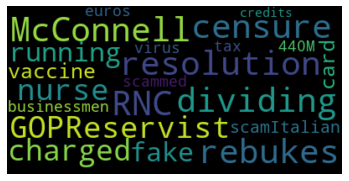

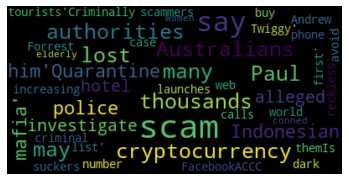

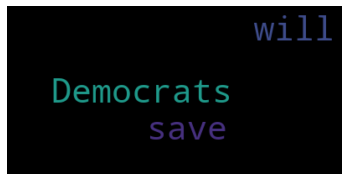

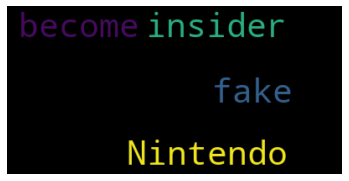

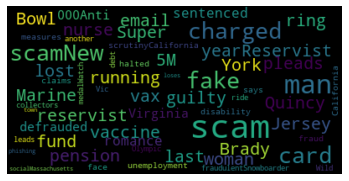

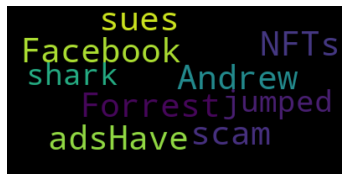

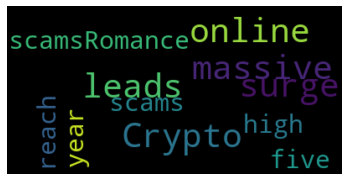

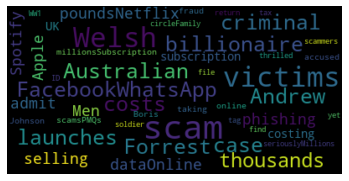

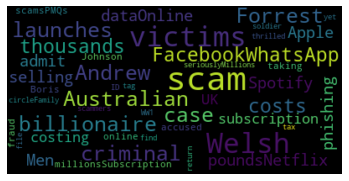

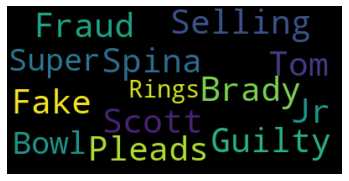

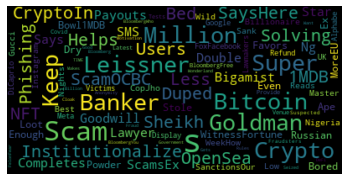

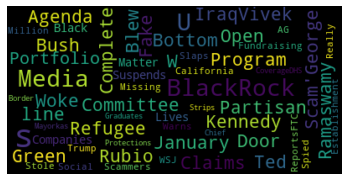

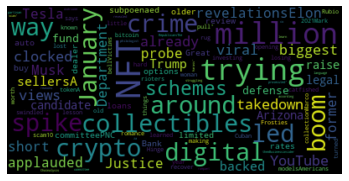

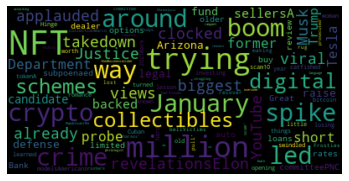

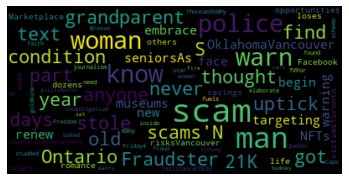

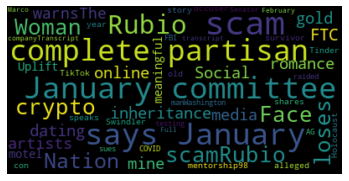

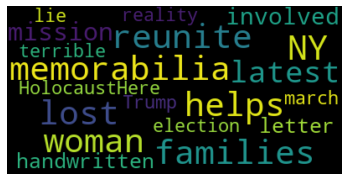

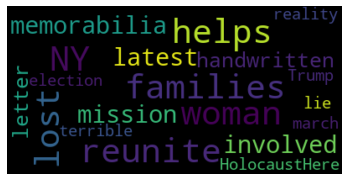

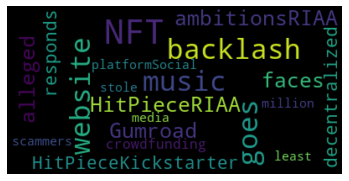

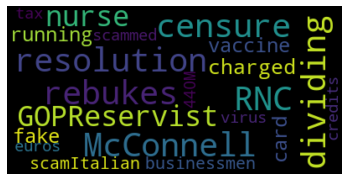

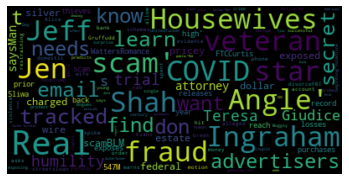

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(len(results)):
    text_combined = ''
    for j in results[i]['articles']:
        text_combined += j['title'] + ''
    
    if text_combined != '':
        wordcloud = WordCloud(max_font_size=40).generate(text_combined)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()